# Problem Statement: 

Assignment 2: Use FakeBill dataset to construct  a decision tree

a) Use sklearn.DecisionTreeClassifier to construct a pure split decision tree on training data

b) Use hyp[er-paramter tuning of DecisionTreeClassifier to find the optimal set of hyper parameters for this problem.
Can use a for loop and gridsearch

## Import Libraries

In [39]:
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Get the Data

In [40]:
df = pd.read_csv("bill_authentication.csv")
params = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]

In [41]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [42]:
x_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]

In [43]:
x_train

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [44]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1)

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy')

[Text(0.5220588235294118, 0.9285714285714286, 'X[0] <= 0.32\nentropy = 0.991\nsamples = 1372\nvalue = [762, 610]'),
 Text(0.3014705882352941, 0.7857142857142857, 'X[1] <= 5.865\nentropy = 0.699\nsamples = 657\nvalue = [124, 533]'),
 Text(0.16176470588235295, 0.6428571428571429, 'X[2] <= 6.219\nentropy = 0.294\nsamples = 521\nvalue = [27, 494]'),
 Text(0.058823529411764705, 0.5, 'X[0] <= -0.362\nentropy = 0.049\nsamples = 365\nvalue = [2, 363]'),
 Text(0.029411764705882353, 0.35714285714285715, 'entropy = 0.0\nsamples = 308\nvalue = [0, 308]'),
 Text(0.08823529411764706, 0.35714285714285715, 'X[2] <= 2.625\nentropy = 0.219\nsamples = 57\nvalue = [2, 55]'),
 Text(0.058823529411764705, 0.21428571428571427, 'entropy = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(0.11764705882352941, 0.21428571428571427, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2647058823529412, 0.5, 'X[1] <= -4.675\nentropy = 0.635\nsamples = 156\nvalue = [25, 131]'),
 Text(0.20588235294117646, 0.3571428571428

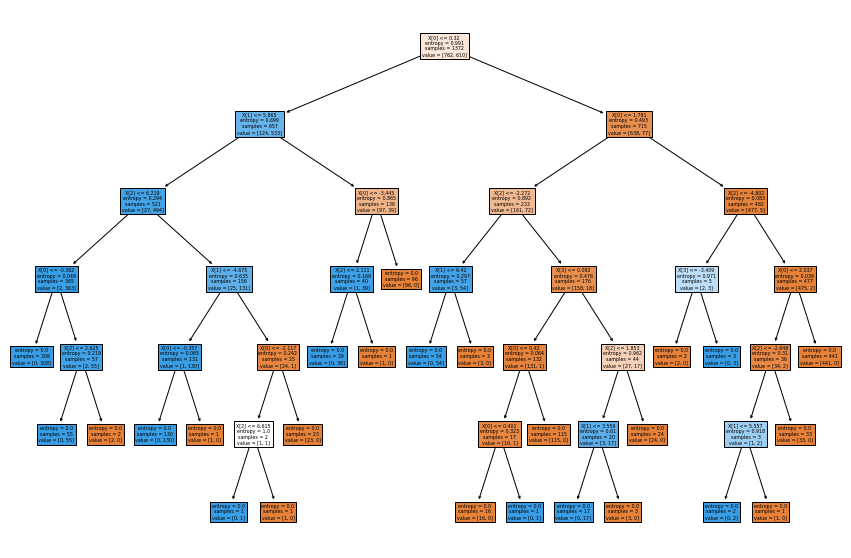

In [10]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'gini',max_depth=2)
classifier2.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[0] <= 0.32\ngini = 0.494\nsamples = 1372\nvalue = [762, 610]'),
 Text(0.25, 0.5, 'X[1] <= 7.565\ngini = 0.306\nsamples = 657\nvalue = [124, 533]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.131\nsamples = 552\nvalue = [39, 513]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.308\nsamples = 105\nvalue = [85, 20]'),
 Text(0.75, 0.5, 'X[2] <= -4.386\ngini = 0.192\nsamples = 715\nvalue = [638, 77]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.363\nsamples = 42\nvalue = [10, 32]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.125\nsamples = 673\nvalue = [628, 45]')]

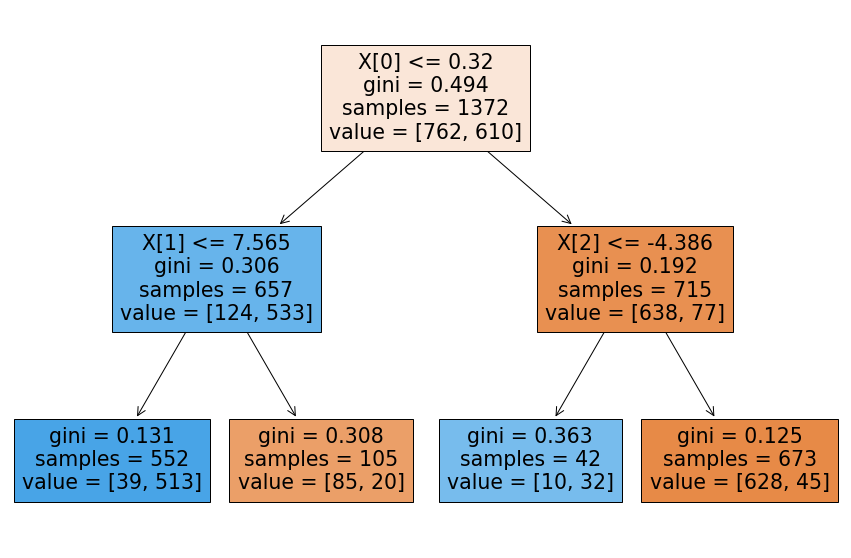

In [12]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier2,filled=True)

In [49]:
## DecisionTreeClassifier gini
model = DecisionTreeClassifier(criterion = "gini", splitter = "best")
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", model.score(x_train, y_train))

Test data accuracy 0.9927536231884058
Train data accuracy 1.0
Train Data score 1.0


In [50]:
## DecisionTreeClassifier entropy
model = DecisionTreeClassifier(criterion = "entropy", splitter = "best") #, min_samples_split=200)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", model.score(x_train, y_train))

Test data accuracy 1.0
Train data accuracy 1.0
Train Data score 1.0


In [51]:
print ("Train Data score", model.score(x_train, y_train)) #Returns mean accuracy of test samples
print ("Train Data score", model.score(x_test, y_test))

Train Data score 1.0
Train Data score 1.0


In [16]:
# conda install -c anaconda python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/asitpiri/opt/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.29  |       hecd8cb5_1         125 KB  anaconda
    cairo-1.14.12              |       hc4e6be7_4         1.2 MB  anaconda
    certifi-2021.10.8          |   py39hecd8cb5_2         156 KB  anaconda
    conda-4.13.0               |   py39hecd8cb5_0         989 KB  anaconda
    conda-build-3.21.9         |   py39hecd8cb5_0         566 KB  anaconda
    expat-2.4.4                |       he9d5cce_0         145 KB  anaconda
    fontconfig-2.13.1          |       ha9ee91d_0         255 

In [17]:
# conda install -c anaconda pydot

Solving environment: done

## Package Plan ##

  environment location: /Users/asitpiri/opt/anaconda3

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydot-1.4.1                |   py39hecd8cb5_0          43 KB  anaconda
    ------------------------------------------------------------
                                           Total:          43 KB

The following NEW packages will be INSTALLED:

  pydot              anaconda/osx-64::pydot-1.4.1-py39hecd8cb5_0



pydot-1.4.1          | 43 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# conda install ruamel-yaml

In [ ]:
# conda install pandas_profiling

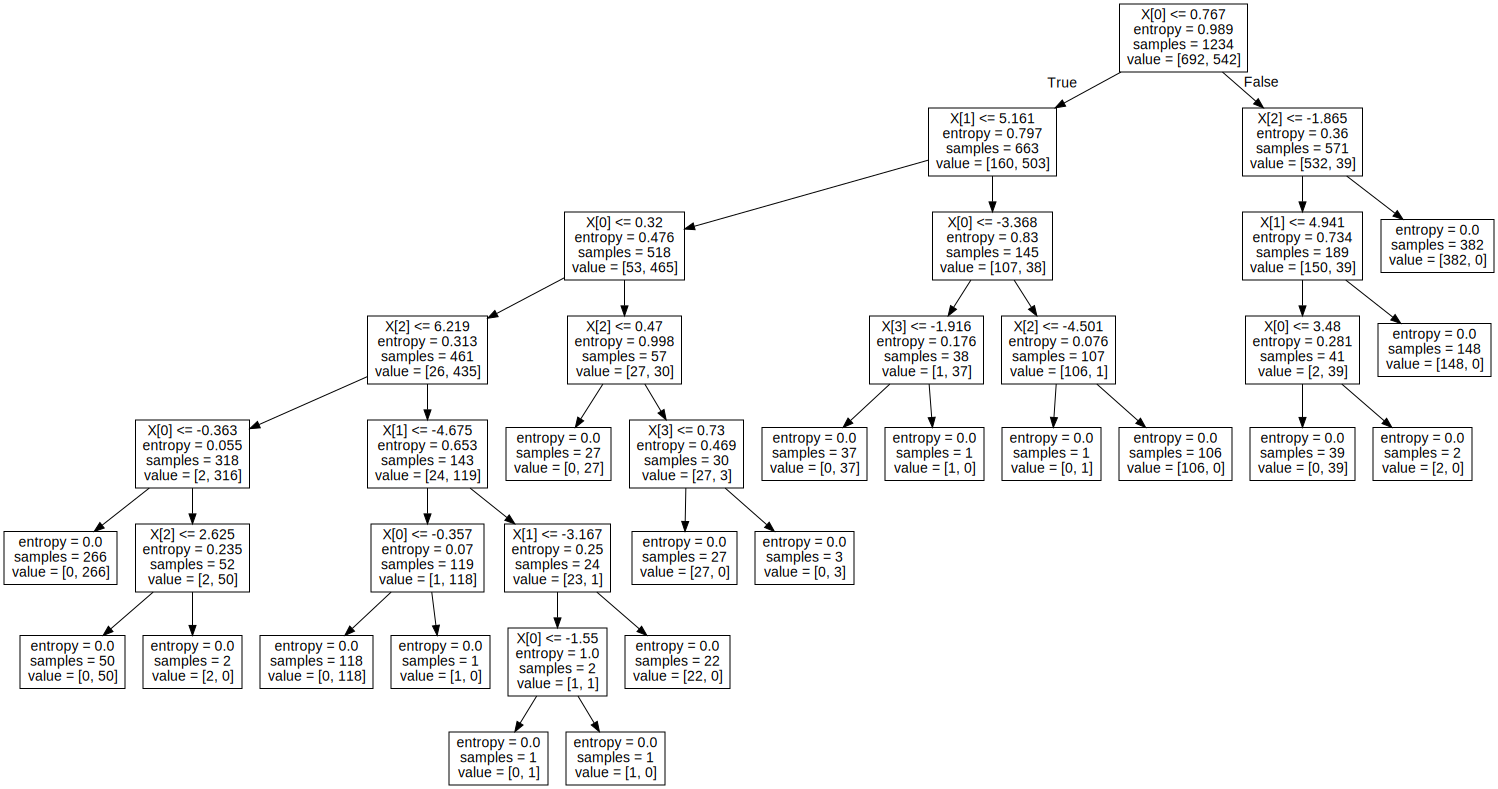

In [52]:
import os
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data) 
graph

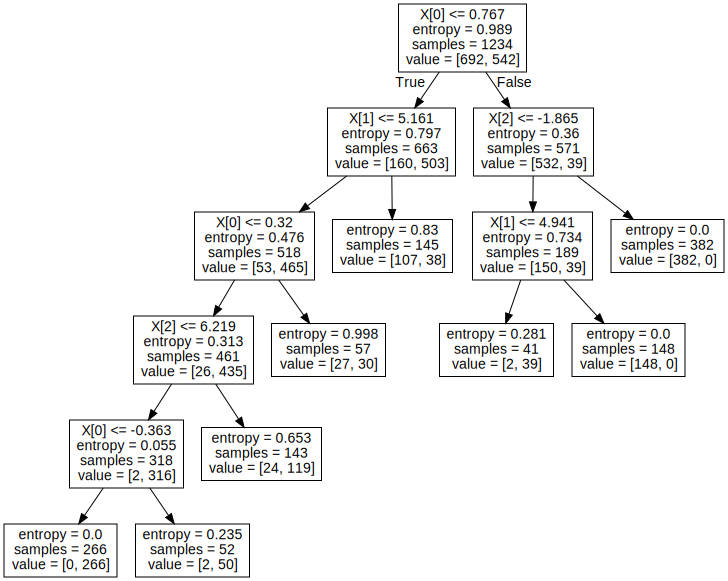

In [53]:
model = DecisionTreeClassifier(criterion = "entropy", splitter = "best", 
#                                max_depth = 2)
#                                min_samples_leaf = 20)
                               min_samples_split=150)
model.fit(x_train, y_train)
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data) 
graph

In [54]:
model.set_params(splitter="random")
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Test Data score", model.score(x_test, y_test))
print ("Train Data score", model.score(x_train, y_train))



Test data accuracy 0.9710144927536232
Train data accuracy 0.9392220421393841
Test Data score 0.9710144927536232
Train Data score 0.9392220421393841


In [55]:
models = [(DecisionTreeClassifier(criterion = "gini", splitter = "best"), "gini"),
             (DecisionTreeClassifier(criterion="entropy"), "entropy")
         ]
for m in models:
    m[0].fit(x_train, y_train)
    y_pred_train = (m[0].predict(x_train))
    y_pred_test = (m[0].predict(x_test))
    print ("Testing data set, using =  ", m[1], "Accuracy= ",  accuracy_score(y_test, y_pred_test))
    print ("Training data set, using =  ", m[1], "Accuracy= ", accuracy_score(y_train, y_pred_train))

Testing data set, using =   gini Accuracy=  0.9855072463768116
Training data set, using =   gini Accuracy=  1.0
Testing data set, using =   entropy Accuracy=  1.0
Training data set, using =   entropy Accuracy=  1.0


In [56]:
print (__name__)
print (globals()["x_train"])

__main__
      Variance  Skewness  Curtosis  Entropy
854    -2.5754   -5.6574   6.10300  0.65214
1365   -4.5046   -5.8126  10.88670 -0.52846
1008   -1.9409   -8.6848   9.15500  0.94049
1369   -3.7503  -13.4586  17.59320 -2.77710
481     2.8261    9.4007  -3.30340 -1.05090
...        ...       ...       ...      ...
714     2.5559    3.3605   2.03210  0.26809
81      4.4682    2.2907   0.95766  0.83058
109     2.9163   10.8306  -3.34370 -4.12200
1282   -1.9983   -6.6072   4.82540 -0.41984
505     2.5650    8.6330  -2.99410 -1.30820

[1234 rows x 4 columns]


In [57]:
print (__name__)
print (globals()["y_train"])

__main__
854     1
1365    1
1008    1
1369    1
481     0
       ..
714     0
81      0
109     0
1282    1
505     0
Name: Class, Length: 1234, dtype: int64


In [58]:
## prepruning grid search cv and cross val score assignments
### Decission Tree Classifier

params = {'max_depth' : [2,4,6,8,10,12],
          'min_samples_split' : [2,3,4],
          'min_samples_leaf' : [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [59]:
ds = DecisionTreeClassifier()

In [60]:
grid_cv = GridSearchCV(ds,param_grid=params)

In [61]:
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [62]:
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [63]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [64]:
models = [(DecisionTreeClassifier(criterion = "gini", splitter = "best"), "gini"),
             (DecisionTreeClassifier(criterion="entropy"), "entropy")
         ]
for m in models:
    m[0].fit(x_train, y_train)
    y_pred_train = (m[0].predict(x_train))
    y_pred_test = (m[0].predict(x_test))
    print ("Testing data set, using =  ", m[1], "Accuracy= ",  accuracy_score(y_test, y_pred_test))
    print ("Training data set, using =  ", m[1], "Accuracy= ", accuracy_score(y_train, y_pred_train))

Testing data set, using =   gini Accuracy=  0.9855072463768116
Training data set, using =   gini Accuracy=  1.0
Testing data set, using =   entropy Accuracy=  1.0
Training data set, using =   entropy Accuracy=  1.0


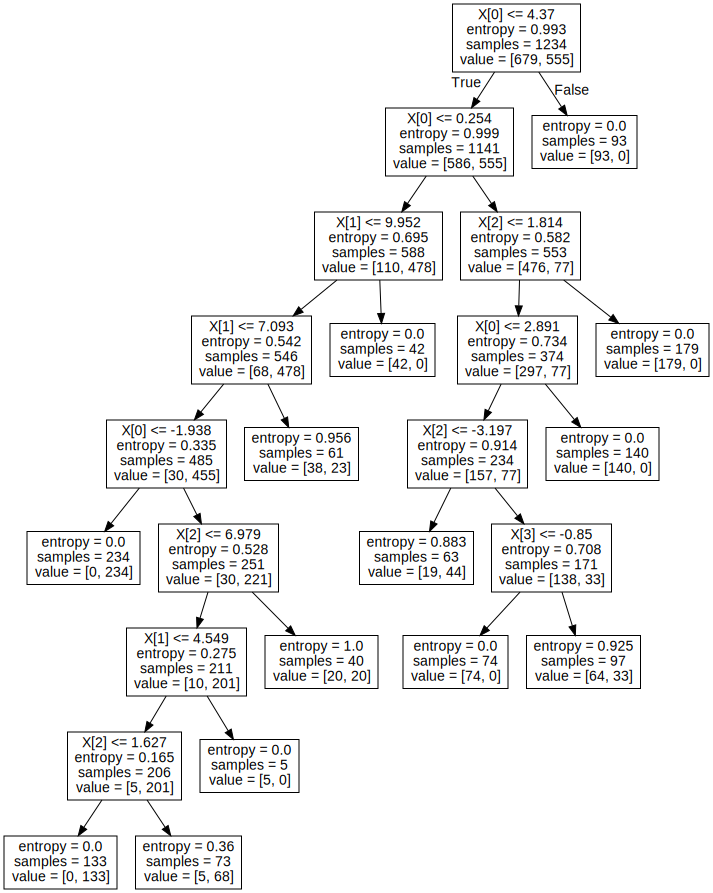

In [36]:
models = DecisionTreeClassifier(criterion = "entropy", splitter = "best", 
#                                max_depth = 2)
#                                min_samples_leaf = 20)
                               min_samples_split=150)
models.fit(x_train, y_train)
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data) 
graph

# Example 2: Decision Tree Construction

In [77]:
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
import seaborn as sns

In [79]:
df = sns.load_dataset('iris')

In [80]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
df['species'] = df['species'].map({"setosa": 0,"versicolor":1, "virginica":2})

In [94]:
x_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.461538461538461

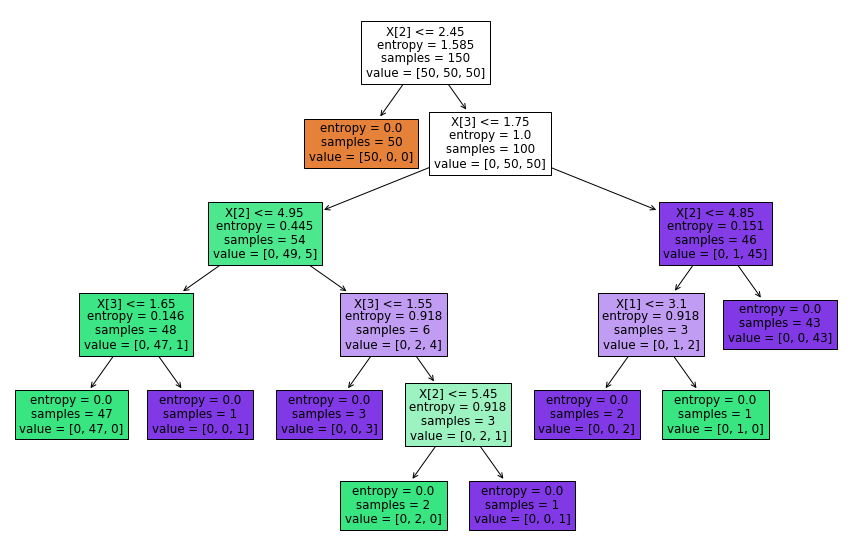

In [96]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [97]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

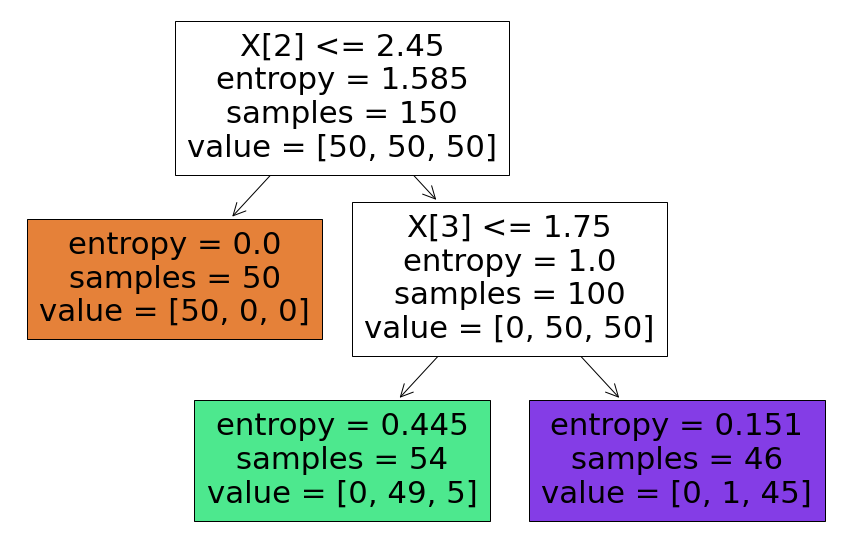

In [98]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [99]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini')
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

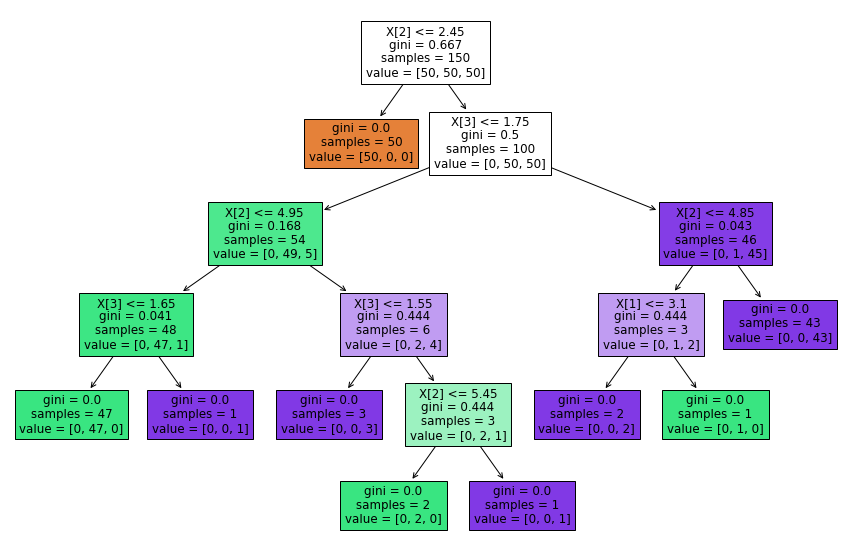

In [100]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [101]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

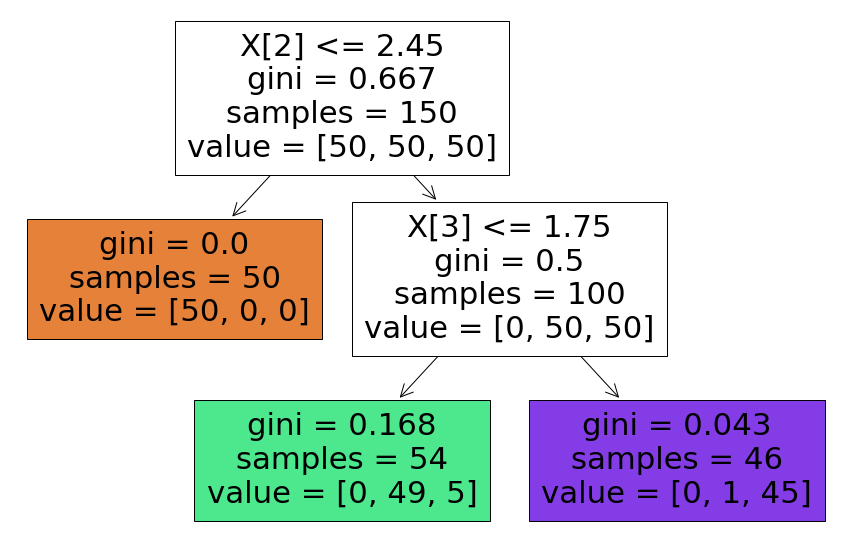

In [102]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [108]:
## Pre Prunning grid search cv and cross validation
#from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [109]:
ds = DecisionTreeClassifier()

In [110]:
grid_cv = GridSearchCV(ds,param_grid=params)

In [111]:
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [112]:
grid_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}